In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [3]:
###Copy this for other files for full database combined
df06 = pd.read_csv("./Data/RB Research Data - 2006-2007.csv")
df07 = pd.read_csv("./Data/RB Research Data - 2007-2008.csv")
df08 = pd.read_csv("./Data/RB Research Data - 2008-2009.csv")
df09 = pd.read_csv("./Data/RB Research Data - 2009-2010.csv")
df10 = pd.read_csv("./Data/RB Research Data - 2010-2011.csv")
df11 = pd.read_csv("./Data/RB Research Data - 2011-2012.csv")
df12 = pd.read_csv("./Data/RB Research Data - 2012-2013.csv")
df13 = pd.read_csv("./Data/RB Research Data - 2013-2014.csv")
df14 = pd.read_csv("./Data/RB Research Data - 2014-2015.csv")
df15 = pd.read_csv("./Data/RB Research Data - 2015-2016.csv")
df16 = pd.read_csv("./Data/RB Research Data - 2016-2017.csv")
df17 = pd.read_csv("./Data/RB Research Data - 2017-2018.csv")
df18 = pd.read_csv("./Data/RB Research Data - 2018-2019.csv")
df19 = pd.read_csv("./Data/RB Research Data - 2019-2020.csv")
df20 = pd.read_csv("./Data/RB Research Data - 2020-2021.csv")
df21 = pd.read_csv("./Data/RB Research Data - 2021-2022.csv")
df22 = pd.read_csv("./Data/RB Research Data - 2022-2023.csv")
df = pd.concat([df06, df07, df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21, df22])
df = df[df['AAV Adjusted'] != -1]
df = df[df["Games Played"] > 8]


In [34]:
#Get nonrookie contract players who played at least half the season
vets = df[df["Rookie Contract (Y/N)"] == "N"]
vets = vets[vets["Games Played"] > 8]
#vets = vets[vets["Contract Length"] > 1.0]
#vets = vets[vets["Contract Length"] > 1.0] 53 occurnces of 1 year deals
vets

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
0,Edgerrin James,ARI,2006,N,4.0,30000000.0,7.500000e+06,102000000,0.073529,16,...,1338,5262,29,0.868460,0.260927,0.206897,1.142250e+07,45690000.0,155346000.0,NaN
1,Warrick Dunn,ATL,2006,N,3.0,12450000.0,4.150000e+06,102000000,0.040686,16,...,2939,5310,30,0.387887,0.246704,0.166667,6.320450e+06,18961350.0,155346000.0,NaN
2,Jamal Lewis,BAL,2006,N,3.0,26000000.0,8.666667e+06,102000000,0.084967,17,...,1637,5072,32,0.723274,0.260844,0.281250,1.319933e+07,39598000.0,155346000.0,NaN
4,Deshaun Foster,CAR,2006,N,3.0,14500000.0,4.833333e+06,102000000,0.047386,14,...,1659,4923,26,0.543098,0.215722,0.115385,7.361167e+06,22083500.0,155346000.0,NaN
5,Thomas Jones,CHI,2006,N,4.0,9250000.0,2.312500e+06,102000000,0.022672,19,...,1918,5199,38,0.790928,0.324485,0.263158,3.521938e+06,14087750.0,155346000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20,Dalvin Cook,MIN,2022,N,5.0,63000000.0,1.260000e+07,208790359,0.060348,18,...,1661,6145,48,0.748344,0.251912,0.208333,1.321740e+07,66087000.0,219021086.6,NaN
22,Alvin Kamara,NO,2022,N,5.0,75000000.0,1.500000e+07,206828041,0.072524,15,...,1982,5674,36,0.452573,0.244448,0.111111,1.573500e+07,78675000.0,216962615.0,NaN
27,Christian McCaffrey,SF,2022,N,4.0,64063500.0,1.601588e+07,206082457,0.077716,14,...,2360,6216,50,0.416949,0.242761,0.260000,1.680065e+07,67202611.5,216180497.4,NaN
29,Leonard Fournette,TB,2022,N,3.0,21000000.0,7.000000e+06,202960773,0.034489,17,...,1308,5894,31,0.519878,0.205124,0.193548,7.343000e+06,22029000.0,212905850.9,NaN


In [35]:
rooks = df[df["Rookie Contract (Y/N)"] == "Y"]
rooks = rooks[rooks["Games Played"] > 8]
rooks

,Player Name,Team,Year,Rookie Contract (Y/N),Contract Length,Total Pay,Yearly Pay (AAV),Team Payroll,Player Percentage of Payroll,Games Played,...,Team Rushing Yards,Team Total Yards,Team Total Touchdowns,Player Percentage of Rushing Yards,Player Percentage of Offensive Yards,Player Percentage of Touchdowns,AAV Adjusted,Total Pay Adjusted,Payroll Adjusted,Unnamed: 0
3,Willis McGahee,BUF,2006,Y,5.0,7053000.0,1410600.00,102000000,0.013829,14,...,1552,4271,28,0.641108,0.269492,0.214286,2148343.800,1.074172e+07,155346000.0,NaN
8,Julius Jones,DAL,2006,Y,4.0,3280000.0,820000.00,102000000,0.008039,17,...,1936,5772,47,0.617769,0.231809,0.085106,1248860.000,4.995440e+06,155346000.0,NaN
9,Tatum Bell,DEN,2006,Y,4.0,3180000.0,795000.00,102000000,0.007794,13,...,2152,4951,32,0.473978,0.229247,0.062500,1210785.000,4.843140e+06,155346000.0,NaN
10,Kevin Jones,DET,2006,Y,5.0,5737500.0,1147500.00,102000000,0.011250,12,...,1129,4949,30,0.608503,0.241463,0.266667,1747642.500,8.738212e+06,155346000.0,NaN
13,Joseph Addai,IND,2006,Y,5.0,10665000.0,2133000.00,102000000,0.020912,20,...,1762,6070,48,0.777526,0.298682,0.208333,3248559.000,1.624280e+07,155346000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,Saquon Barkley,NYG,2022,Y,4.0,31194751.0,7798687.75,203667109,0.038291,18,...,2519,5676,38,0.566098,0.324348,0.315789,8180823.450,3.272329e+07,213646797.3,NaN
25,Miles Sanders,PHI,2022,Y,4.0,5350175.0,1337543.75,219359743,0.006097,20,...,2509,6614,57,0.565564,0.226792,0.228070,1403083.394,5.612334e+06,230108370.4,NaN
26,Najee Harris,PIT,2022,Y,4.0,13047447.0,3261861.75,210658592,0.015484,17,...,2073,5484,28,0.500724,0.231036,0.357143,3421692.976,1.368677e+07,220980863.0,NaN
28,Kenneth Walker III,SEA,2022,Y,4.0,8441581.0,2110395.25,215796566,0.009780,16,...,2042,5976,42,0.545054,0.214357,0.238095,2213804.617,8.855218e+06,226370597.7,NaN


In [36]:
v_length = vets.groupby('Year')['Contract Length'].mean()
r_length = rooks.groupby('Year')['Contract Length'].mean()

In [37]:
v_length

Year
2006    4.062500
2007    4.333333
2008    4.705882
2009    4.153846
2010    4.090909
2011    3.375000
2012    4.058824
2013    3.611111
2014    2.800000
2015    3.357143
2016    2.933333
2017    2.562500
2018    2.555556
2019    3.000000
2020    2.428571
2021    2.916667
2022    3.142857
Name: Contract Length, dtype: float64

Text(0.5, 1.0, 'Average Contract Length of RBs not on rookie deals')

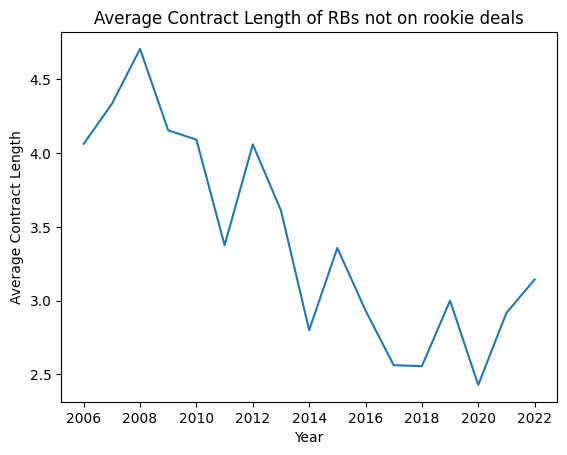

In [38]:
plt.plot(v_length)
plt.xlabel('Year')
plt.ylabel('Average Contract Length')
plt.title('Average Contract Length of RBs not on rookie deals')

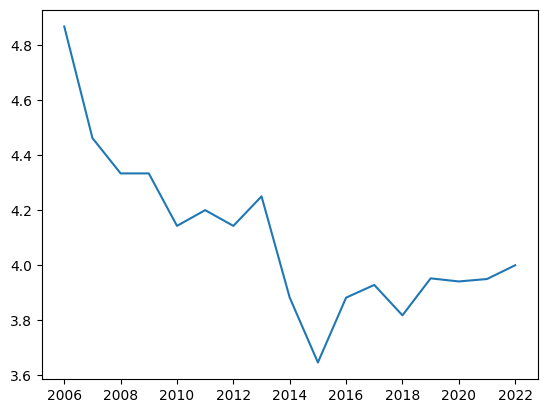

In [39]:
plt.plot(r_length)